In [1]:
# Importing the libraries1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Problem Statement

Your client is a multinational financial company, which offers multiple products to the
consumers. There are multiple channels to offer these products to consumers although major
contribution is coming from offline distribution channels.


Offline channels sell Financial products to consumers via their agent network and as per
government regulation these agents must be certified to sell financial products. There are
multiple certification programs against different categories of financial products.
As this offline channel shares major contributions to total company sales, the company focuses
on recruitment and certifies them to build a large agent network. Here, a major challenge is
training them to get the certifications to sell various types of products.


You are given a dataset of trainee performance for the training curriculum test wise within
multiple programs. Your task is to predict the performance on such tests given the demographic
information and training program/test details. This will enable your client to strengthen its
training problem by figuring out the most important factors that lead to a better engagement and
performance for a trainee.

# Data Cleaning

In [2]:
X=pd.read_csv("Train.csv")
y=pd.read_csv("Test.csv")

In [3]:
X.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,13695_33,T_2,T,117,33,offline,intermediate,13695,F,Matriculation,2,43.0,2,N,1.0,1
1,873_139,Y_2,Y,120,139,offline,hard,873,M,Matriculation,2,NaN,2,N,3.0,1
2,6987_73,V_4,V,122,73,online,easy,6987,M,Matriculation,1,NaN,2,N,3.0,1
3,3380_100,V_1,V,133,100,offline,vary hard,3380,F,High School Diploma,3,30.0,2,Y,1.0,0
4,1906_114,Y_4,Y,121,114,offline,intermediate,1906,M,High School Diploma,3,NaN,2,N,5.0,1


In [4]:
y.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,17586_149,Y_1,Y,136,149,offline,intermediate,17586,M,Matriculation,1,42.0,2,Y,3.0
1,714_26,T_3,T,134,26,offline,intermediate,714,F,Matriculation,3,25.0,2,Y,1.0
2,10594_84,V_3,V,131,84,offline,intermediate,10594,F,High School Diploma,3,24.0,3,N,1.0
3,19786_83,V_3,V,131,83,offline,intermediate,19786,M,Matriculation,3,NaN,4,N,3.0
4,6289_160,Y_1,Y,136,160,online,easy,6289,M,High School Diploma,1,45.0,3,N,4.0


In [5]:
X['age'].fillna(value=np.floor(X['age'].mean()),inplace=True)

In [6]:
y['age'].fillna(value=np.floor(X['age'].mean()),inplace=True)

In [7]:
from statistics import mode 
X['trainee_engagement_rating'].fillna(value=mode(X['trainee_engagement_rating']),inplace=True)

In [8]:
y['trainee_engagement_rating'].fillna(value=mode(y['trainee_engagement_rating']),inplace=True)

In [9]:
X.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,13695_33,T_2,T,117,33,offline,intermediate,13695,F,Matriculation,2,43.0,2,N,1.0,1
1,873_139,Y_2,Y,120,139,offline,hard,873,M,Matriculation,2,36.0,2,N,3.0,1
2,6987_73,V_4,V,122,73,online,easy,6987,M,Matriculation,1,36.0,2,N,3.0,1
3,3380_100,V_1,V,133,100,offline,vary hard,3380,F,High School Diploma,3,30.0,2,Y,1.0,0
4,1906_114,Y_4,Y,121,114,offline,intermediate,1906,M,High School Diploma,3,36.0,2,N,5.0,1


In [10]:
#X['difficulty_level'].value_counts()

In [11]:
#sns.regplot(x='total_programs_enrolled',y='total_programs_enrolled',data=X)

In [12]:
X[X['trainee_engagement_rating'].isnull()]

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass


In [13]:
X.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

# EDA 

In [14]:
import seaborn as sns

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51202 entries, 0 to 51201
Data columns (total 16 columns):
id                           51202 non-null object
program_id                   51202 non-null object
program_type                 51202 non-null object
program_duration             51202 non-null int64
test_id                      51202 non-null int64
test_type                    51202 non-null object
difficulty_level             51202 non-null object
trainee_id                   51202 non-null int64
gender                       51202 non-null object
education                    51202 non-null object
city_tier                    51202 non-null int64
age                          51202 non-null float64
total_programs_enrolled      51202 non-null int64
is_handicapped               51202 non-null object
trainee_engagement_rating    51202 non-null float64
is_pass                      51202 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 6.3+ MB


In [16]:
X.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,51202.000000,51202.000000,51202.000000,51202.000000,51202.000000,51202.000000,51202.000000,51202.000000
mean,128.200715,90.918656,9839.815964,2.247432,36.298914,2.583571,2.392426,0.695403
std,6.887036,51.210900,5704.134749,1.012165,7.136675,1.236548,1.323202,0.460241
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5030.000000,1.000000,30.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,36.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14535.000000,3.000000,43.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


1. Different variable are scatter differently so we can normalize them, it will help if we are using regression type      algorithm
2. There are no null value left 

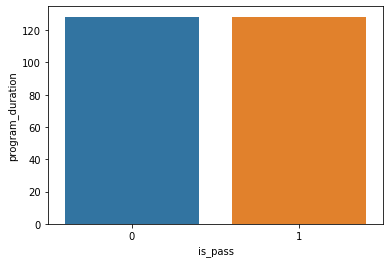

In [17]:
sns.barplot(y='program_duration',x='is_pass',data=X)

At an average there are no difference in pass or fail compare to program duration

In [18]:
pd.pivot_table(index=['is_pass'],data=X)

,age,city_tier,program_duration,test_id,total_programs_enrolled,trainee_engagement_rating,trainee_id
is_pass,,,,,,,
0,35.694216,2.354578,128.163183,84.971082,2.643306,2.005707,9531.469159
1,36.563781,2.200500,128.217154,93.523788,2.557406,2.561815,9974.876819


1. We can see that pass is not much affected by age, total program enrolled
2. Pass is varied by trainee engagement rating 
3. We can use PCA to reduce the dimension and get the best dimension where there is high varibility

test_type  offline  online
is_pass                   
0            11015    4581
1            19433   16173


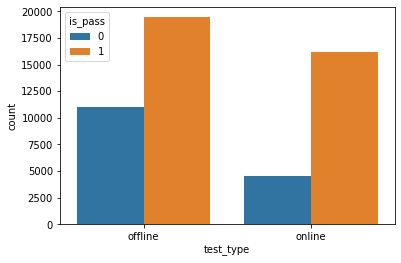

In [19]:
sns.countplot(X["test_type"],hue=X['is_pass'])
print(pd.crosstab(index=X["is_pass"], 
                           columns=X['test_type']))

1. Looks like passing and failing person are more in offline class than in online class
2. But if we compare the ratio of offline failing people are more than 2 time of online and there is not much difference in passing ratio of offline and online 
3. We can say that offline and online has much variablility in failing person than passing

In [20]:
pd.crosstab(index=X["is_pass"], 
                           columns=X["difficulty_level"])


difficulty_level,easy,hard,intermediate,vary hard
is_pass,,,,
0,7344,2422,4966,864
1,20721,4792,9463,630


1. We can see that if the as the difficulty level increase chance od passing of a person decreases

In [21]:
pd.crosstab(index=X["is_pass"], 
                           columns=X["gender"])

gender,F,M
is_pass,,
0,7491,8105
1,16399,19207


1. There is not much difference in failing of a person by gender
2. But Males tends to pass more as compare to female

In [22]:
pd.crosstab(index=X["is_pass"], 
                           columns=X["city_tier"])

city_tier,1,2,3,4
is_pass,,,,
0,4322,3431,5834,2009
1,11902,7890,12587,3227


1. We can see that tier 1 and 3 city people tends to fail or pass more but we cannot conclude as the data is more in tier 1 and 3

# Data Preprocessing

In [23]:
X_train=X.iloc[:,[2,3,5,6,8,9,10,11,12,13,14]].values

In [24]:
X_train

array([['T', 117, 'offline', ..., 2, 'N', 1.0],
       ['Y', 120, 'offline', ..., 2, 'N', 3.0],
       ['V', 122, 'online', ..., 2, 'N', 3.0],
       ...,
       ['T', 134, 'offline', ..., 2, 'N', 1.0],
       ['U', 134, 'offline', ..., 6, 'N', 4.0],
       ['Y', 136, 'offline', ..., 4, 'N', 5.0]], dtype=object)

In [25]:
X_test=X.iloc[:,15].values
X_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [26]:
y_train=y.iloc[:,[2,3,5,6,8,9,10,11,12,13,14]].values

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:,0] = labelencoder.fit_transform(X_train[:, 0])


In [28]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:,2] = labelencoder.fit_transform(X_train[:, 2])


In [29]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:,3] = labelencoder.fit_transform(X_train[:, 3])

In [30]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:,4] = labelencoder.fit_transform(X_train[:, 4])

In [31]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:,5] = labelencoder.fit_transform(X_train[:, 5])

In [32]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:,9] = labelencoder.fit_transform(X_train[:, 9])

In [33]:
X_train[:,[0,2,3,4,5,9]]

array([[1, 0, 2, 0, 3, 0],
       [5, 0, 1, 1, 3, 0],
       [3, 1, 0, 1, 3, 0],
       ...,
       [1, 0, 2, 0, 1, 0],
       [2, 0, 0, 0, 3, 0],
       [5, 0, 2, 0, 1, 0]], dtype=object)

In [34]:
w=pd.DataFrame(X_train)
w.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,117,0,2,0,3,2,43,2,0,1
1,5,120,0,1,1,3,2,36,2,0,3
2,3,122,1,0,1,3,1,36,2,0,3
3,3,133,0,3,0,1,3,30,2,1,1
4,5,121,0,2,1,1,3,36,2,0,5


In [35]:
import sklearn.preprocessing
a = X_train[:,3].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)


In [36]:
X_train=np.concatenate((b,X_train),axis=1)
X_train = X_train[:, 1:]


In [37]:
#import sklearn.preprocessing
a = X_train[:,8].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
b

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0]])

In [38]:
X_train=np.concatenate((b,X_train),axis=1)
X_train= X_train[:, 1:]
X_train

array([[0, 0, 1, ..., 2, 0, 1.0],
       [0, 0, 1, ..., 2, 0, 3.0],
       [0, 0, 1, ..., 2, 0, 3.0],
       ...,
       [1, 0, 0, ..., 2, 0, 1.0],
       [0, 0, 1, ..., 6, 0, 4.0],
       [1, 0, 0, ..., 4, 0, 5.0]], dtype=object)

In [39]:
#import sklearn.preprocessing
a = X_train[:,7].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
X_train=np.concatenate((b,X_train),axis=1)
X_train= X_train[:, 1:]
X_train

array([[1, 0, 0, ..., 2, 0, 1.0],
       [0, 0, 0, ..., 2, 0, 3.0],
       [0, 0, 1, ..., 2, 0, 3.0],
       ...,
       [1, 0, 0, ..., 2, 0, 1.0],
       [0, 1, 0, ..., 6, 0, 4.0],
       [0, 0, 0, ..., 4, 0, 5.0]], dtype=object)

In [40]:
X_train=X_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,19,20,21,22,23]]

In [41]:
v=pd.DataFrame(X_train)
v=v.astype(float)
#v[v[14].isnull()]
v.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,117.0,0.0,0.0,2.0,43.0,2.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,120.0,0.0,1.0,2.0,36.0,2.0,0.0,3.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,122.0,1.0,1.0,1.0,36.0,2.0,0.0,3.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,133.0,0.0,0.0,3.0,30.0,2.0,1.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,121.0,0.0,1.0,3.0,36.0,2.0,0.0,5.0


In [42]:
x=v.values
#v.dtypes
X_train=x


In [43]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y_train[:,0] = labelencoder.fit_transform(y_train[:, 0])


In [44]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y_train[:,2] = labelencoder.fit_transform(y_train[:, 2])
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y_train[:,3] = labelencoder.fit_transform(y_train[:, 3])
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y_train[:,4] = labelencoder.fit_transform(y_train[:, 4])
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y_train[:,5] = labelencoder.fit_transform(y_train[:, 5])
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y_train[:,9] = labelencoder.fit_transform(y_train[:, 9])

In [45]:
#import sklearn.preprocessing
a = y_train[:,3].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
y_train=np.concatenate((b,y_train),axis=1)
y_train = y_train[:, 1:]
#import sklearn.preprocessing
a = y_train[:,8].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
y_train=np.concatenate((b,y_train),axis=1)
y_train= y_train[:, 1:]
y_train

array([[0, 0, 1, ..., 2, 1, 3.0],
       [0, 0, 1, ..., 2, 1, 1.0],
       [1, 0, 0, ..., 3, 0, 1.0],
       ...,
       [1, 0, 0, ..., 3, 0, 3.0],
       [1, 0, 0, ..., 2, 0, 5.0],
       [1, 0, 0, ..., 2, 0, 3.0]], dtype=object)

In [46]:
#import sklearn.preprocessing
a = y_train[:,7].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
y_train=np.concatenate((b,y_train),axis=1)
y_train= y_train[:, 1:]
y_train

array([[0, 0, 0, ..., 2, 1, 3.0],
       [1, 0, 0, ..., 2, 1, 1.0],
       [0, 0, 1, ..., 3, 0, 1.0],
       ...,
       [0, 0, 1, ..., 3, 0, 3.0],
       [0, 0, 0, ..., 2, 0, 5.0],
       [0, 0, 0, ..., 2, 0, 3.0]], dtype=object)

In [47]:
y_train=y_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,19,20,21,22,23]]
v=pd.DataFrame(y_train)
v=v.astype(float)
y_train=v.values
v.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,136.0,0.0,1.0,1.0,42.0,2.0,1.0,3.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,134.0,0.0,0.0,3.0,25.0,2.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,131.0,0.0,0.0,3.0,24.0,3.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,131.0,0.0,1.0,3.0,36.0,4.0,0.0,3.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,136.0,1.0,1.0,1.0,45.0,3.0,0.0,4.0


In [48]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train[:,[7,10,11,12,14]] = sc.fit_transform(X_train[:,[7,10,11,12,14]])
#y_train[:,[7,10,11,12,14]] = sc.fit_transform(y_train[:,[7,10,11,12,14]])
#X_test = sc.transform(X_test)

In [49]:
#import statsmodels.regression.linear_model as sm

In [50]:
#X_opt=X_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,12,14]]
#y_opt=y_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,12,14]]

In [51]:
#regressor_OLS=sm.OLS(endog=X_test,exog=X_opt).fit()

In [52]:
#regressor_OLS.summary()

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
y_train = pca.transform(y_train)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.48772583, 0.45123866])

In [54]:
#!pip install xgboost

# Modeling Starts Form Here

In [56]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, X_test) #Selected the best algorithm after comparing the error of different algorithm

DecisionTreeClassifier(random_state=0)

In [57]:
y_pred = classifier.predict(y_train)

In [58]:
y_pred1= classifier.predict(X_train)

In [59]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(X_test, y_pred1)
ns_probs = [0 for _ in range(len(X_test))]
lr_fpr, lr_tpr, _ = metrics.roc_curve(X_test, ns_probs)

In [60]:
auc = metrics.roc_auc_score(X_test, y_pred1)
print('AUC: %.3f' % auc)

AUC: 0.864


Got the best accuracy score after comparing different algorithms

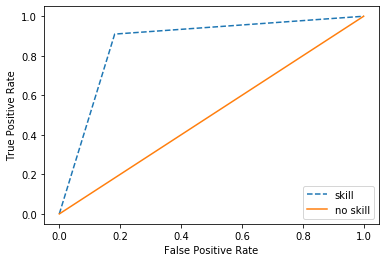

In [61]:
plt.plot(fpr, tpr, linestyle='--', label='skill')
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='no skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [62]:
y['is_pass']=y_pred
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [63]:
t=y[['id','is_pass']]

In [65]:
t.to_csv("submission3.csv",index=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


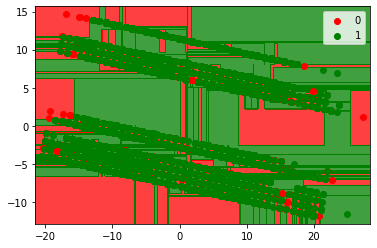

In [56]:
#For pca =2
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, X_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


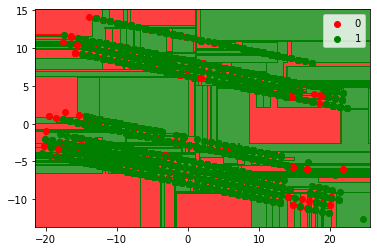

In [57]:
#for pca=2
from matplotlib.colors import ListedColormap
X_set, y_set = y_train, y_pred
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.legend()
plt.show()

### Background color is the actual value or true value and dotted color are the predicted value 
### This is to check how well the model has predicted